Python又是怎么解决这些问题的？换句话说，对于不会再用到的内存空间，Python是通过什么机制来回收这些空间的呢？

**技术引用**

In [3]:
import os
import psutil

# 显示当前python程序占用的内存大小
def show_memory_info(hint):
    pid = os.getpid()
    p = psutil.Process(pid)
    
    info = p.memory_full_info()
    memory = info.uss / 1024. / 1024
    print('{} memory used: {} MB'.format(hint, memory))
show_memory_info('chris macbook')

chris macbook memory used: 58.578125 MB


In [4]:
def func():
    show_memory_info('initial')
    a = [i for i in range(10000000)]
    show_memory_info('after a created')

func()
show_memory_info('finished')

initial memory used: 22.77734375 MB
after a created memory used: 265.0546875 MB
finished memory used: 17.65234375 MB


In [5]:
def func():
    show_memory_info('initial')
    global a
    a = [i for i in range(10000000)]
    show_memory_info('after a created')

func()
show_memory_info('finished')

initial memory used: 13.6953125 MB
after a created memory used: 190.55859375 MB
finished memory used: 186.953125 MB


In [6]:
def func():
    show_memory_info('initial')
    a = [i for i in range(10000000)]
    show_memory_info('after a created')
    return a

a = func()
show_memory_info('finished')

initial memory used: 8.7109375 MB
after a created memory used: 210.56640625 MB
finished memory used: 214.046875 MB


由表及里，下面，我们深入看一下Python内部的引用技术机制。老规矩，先来看代码。

In [7]:
import sys

a = []
# 两次引用，一次来自a，一次来自getrefcount
print(sys.getrefcount(a))

def func(a):
    # 四次引用，a，python的函数调用栈，函数参数，和getrefcount
    print(sys.getrefcount(a))

func(a)
# 两次引用，一次来自a，一次来自getrefcount，函数func调用已经不存在
print(sys.getrefcount(a))

2
4
2


方法同样很简单。你只需要先调用del a来删除对象的引用；然后强制调用gc.collect()，清楚没有引用的对象，即可手动启动垃圾回收。


In [8]:
import gc

show_memory_info('initial')

a = [i for i in range(10000000)]

show_memory_info('after a created')

del a
gc.collect()

show_memory_info('finish')
print(a)



initial memory used: 10.27734375 MB
after a created memory used: 217.359375 MB
finish memory used: 55.86328125 MB


NameError: name 'a' is not defined

**循环引用**

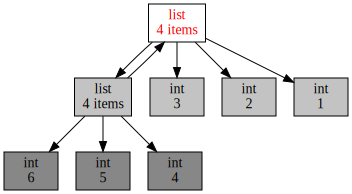

In [14]:
import objgraph

a = [1, 2, 3]
b = [4, 5, 6]

a.append(b)
b.append(a)

objgraph.show_refs([a])

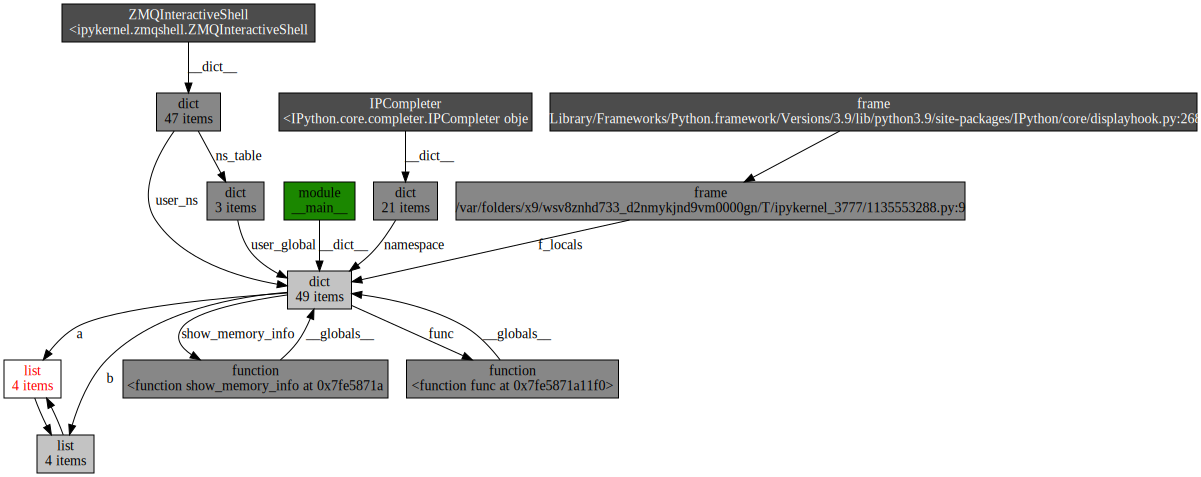

In [15]:
import objgraph

a = [1, 2, 3]
b = [4, 5, 6]
a.append(b)
b.append(a)

objgraph.show_backrefs([a])